#Sentiment sentiment analysis


###our goal is to find tweet is positive or negitive


###Importing liabraries



In [77]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier


from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

##uploading dataset


##Accessing dataset

In [78]:
data=pd.read_csv('Sentiment.csv')
data=data[['text','sentiment']]
print(data.head(5))

                                                text sentiment
0  RT @NancyLeeGrahn: How did everyone feel about...   Neutral
1  RT @ScottWalker: Didn't catch the full #GOPdeb...  Positive
2  RT @TJMShow: No mention of Tamir Rice and the ...   Neutral
3  RT @RobGeorge: That Carly Fiorina is trending ...  Positive
4  RT @DanScavino: #GOPDebate w/ @realDonaldTrump...  Positive


##spliting dataset into training dataset and test dataset


In [79]:
train,test=train_test_split(data,test_size=0.25)
train=train[train.sentiment!="Neutral"] #Removeing neutral statements

####separated the Positive and Negative tweets of the training set in order to easily visualize their contained words.



Positive words


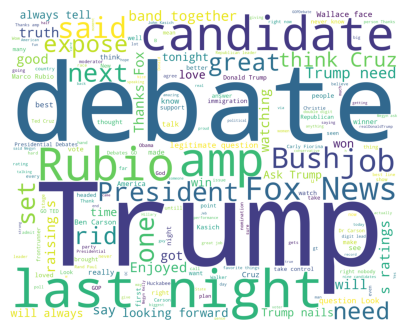

Negative words


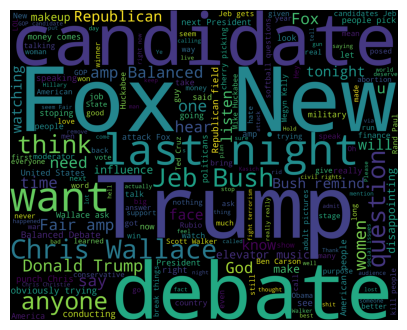

In [80]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(5, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

##### Interesting to notice the following words and expressions in the positive word set: truth, strong, legitimate, together, love, job
#####In my interpretation, people tend to believe that their ideal candidate is truthful, legitimate, above good and bad.
#####At the same time, negative tweets contains words like: influence, news, elevatormusic, disappointing, softball, makeup, cherry picking, trying
#####In my understanding people missed the decisively acting and considered the scolded candidates too soft and cherry picking.
#####After the vizualization, I removed the hashtags, mentions, links and stopwords from the training set.
###Stop Word: Stop Words are words which do not contain important significance to be used in Search Queries.
#####Usually these words are filtered out from search queries because they return vast amount of unnecessary information. ( the, for, this etc. )

In [82]:

tweets=[]
stopwords_set=set(stopwords.words('english'))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
                   if 'http' not in word
                   and not word.startswith('@')
                   and not word.startswith('#')
                   and word!='RT']
    word_without_stopword=[word for word in words_cleaned if not word in stopwords_set]
    tweets.append((word_without_stopword, row.sentiment))
test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

####As a next step I extracted the so called features with nltk lib, first by measuring a frequent distribution and by selecting the resulting keys.



In [83]:
#extracting word features
def get_word_in_tweets(tweets):
  all=[]
  for(words,sentiment)in tweets:
    all.extend(words)
    return all
def get_word_features(wordlist):
  wordlist=nltk.FreqDist(wordlist)
  features=wordlist.keys()
  return features
w_features=get_word_features(get_word_in_tweets(tweets))

def extract_features(document):
  document_words=set(document)
  features={}
  for word in w_features:
    features['contains(%s)'% word]=(word in document_words)
    return features

Hereby I plotted the most frequently distributed words. The most words are centered around debate nights.

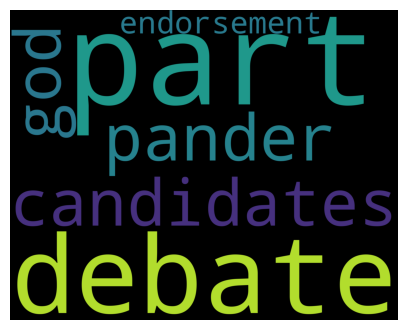

In [84]:
wordcloud_draw(w_features)

####using the nltk naviebayes classifier i classifier i classified extracted tweet word features


In [85]:
training_set=nltk.classify.apply_features (extract_features,tweets)
classifier =nltk.NaiveBayesClassifier.train(training_set)

Finally, with not-so-intelligent metrics, I tried to measure how the classifier algorithm scored.

In [86]:
neg_cnt=0
pos_cnt=0
for obj in test_neg:
  res=classifier.classify(extract_features(obj.split()))
  if(res=='Negitive'):
    neg_cnt=neg_cnt+1
for obj in test_pos:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'):
        pos_cnt = pos_cnt +1
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 2122/0 
[Positive]: 572/0 
